In [23]:
# Leitura de Dados
import pandas as pd

# Visualização personalizada e imediata de varios gráficos
import seaborn as sb
import matplotlib.pyplot as plt

# Separação e Treino em Excesso
from sklearn.model_selection import train_test_split, GridSearchCV

# Classificador de Floresta
from sklearn.ensemble import RandomForestClassifier

# Métricas, relatórios e visualização dos mesmos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [4]:
df = pd.read_csv('fullyTreated2.csv').drop(columns='Unnamed: 0')

In [6]:
# Conferir valores de general_pressure
df['general_pressure'].value_counts(dropna=False)

general_pressure
3.0    529
5.0    522
4.0    504
2.0    501
1.0    500
Name: count, dtype: int64

In [7]:
# Visualização de todas as colunas
df.columns

Index(['gender', 'age', 'working_professional_or_student', 'profession',
       'academic_pressure', 'work_pressure', 'study_satisfaction',
       'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression',
       'general_pressure', 'general_satisfaction', 'sector', 'stress_level'],
      dtype='object')

In [8]:
# Separação das colunas métricas
xcols = ['gender', 'age', 'working_professional_or_student',
        'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness',
       'general_pressure', 'general_satisfaction', 'sector', 'stress_level']

# Separação da classe final
ycols = ['depression']

In [9]:
# Inicialização de um DataFrame das colunas métricas
X = df[xcols]

# Inicialização de um DataFrame da coluna de validação
Y = df[ycols]

In [10]:
# Dados de teste e treino, com 20% deles sendo teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Criação de um modelo de floresta vazio
forest = RandomForestClassifier()

In [12]:
# Criação dos parametros de treino em excesso
params = {
    'n_estimators': [1, 10, 100],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
# Criação do modelo de treino excessivo
model = GridSearchCV(estimator=forest, param_grid=params)
model.fit(x_train, y_train)

C:\Users\Bruno\miniconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Bruno\miniconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Bruno\miniconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Bruno\miniconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [1, 10, 100]})

In [16]:
# Separação do melhor modelo possível
best = model.best_estimator_

In [17]:
# Visualização dos melhores parâmetros para o modelo de treino excessivo
best.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=7)>

In [18]:
# predição dos valores de treino excessivo
pred = pd.DataFrame(best.predict(x_test))

In [19]:
# Acurácia do modelo
accuracy_score(pred, y_test)

0.939453125

In [20]:
# Relatório de classificação
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       429
           1       0.92      0.69      0.79        83

    accuracy                           0.94       512
   macro avg       0.93      0.84      0.88       512
weighted avg       0.94      0.94      0.94       512



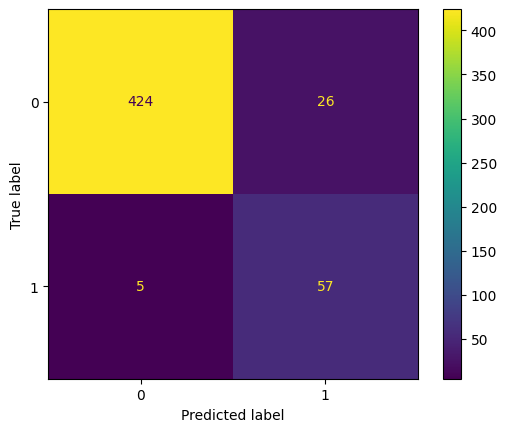

In [21]:
# Matriz de confusão
cf = confusion_matrix(pred, y_test)
cfDisplay = ConfusionMatrixDisplay(cf)
cfDisplay.plot()

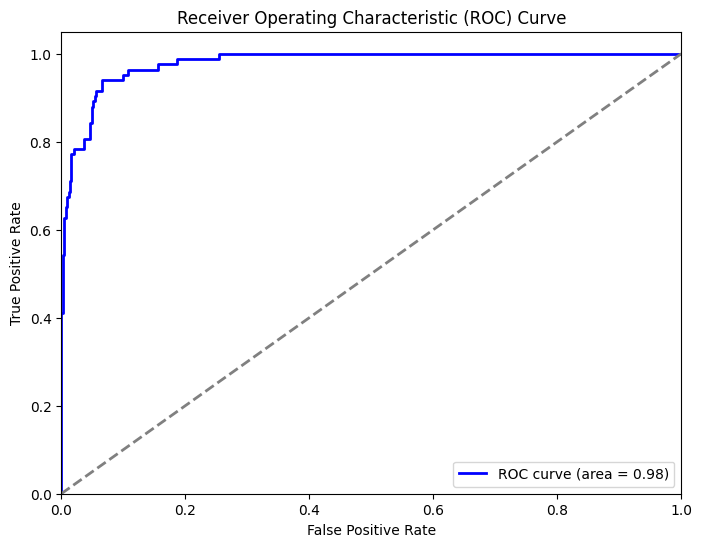

In [24]:
# Calculando as probabilidades de previsão para a classe positiva
y_prob = best.predict_proba(x_test)[:, 1]  # Probabilidade da classe '1' (depressão)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha diagonal (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()